In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv("./Data.csv")

In [3]:
data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,06-Nov-2020,EQ,"1,990.00","2,040.00","1,978.15","1,955.00","2,025.00","2,029.15","2,015.72","2,369.35",875.65,30770080,"62,023,880,104.20",649196
1,05-Nov-2020,EQ,"1,954.95","1,960.95","1,932.00","1,913.20","1,956.80","1,955.00","1,949.03","2,369.35",875.65,17170274,"33,465,297,065.50",448665
2,04-Nov-2020,EQ,"1,837.00","1,929.00","1,837.00","1,850.40","1,910.50","1,913.20","1,893.24","2,369.35",875.65,37003111,"70,055,655,614.20",888904
3,03-Nov-2020,EQ,"1,890.00","1,909.00","1,835.10","1,877.45","1,854.50","1,850.40","1,873.92","2,369.35",875.65,40931170,"76,701,761,539.15",990935
4,02-Nov-2020,EQ,"2,027.00","2,027.00","1,859.15","2,054.50","1,876.00","1,877.45","1,927.55","2,369.35",875.65,45857806,"88,393,320,147.20",1428490


In [4]:
data.drop(columns={"series ","OPEN ","HIGH ","LOW ","PREV. CLOSE ","ltp ","vwap ","52W H ","52W L ","VOLUME ","VALUE ","No of trades "},inplace=True)

In [5]:
data.rename(columns={"close ":"close"},inplace=True)

In [6]:
for i in range(len(data.close)):
    a=data.close.iloc[i]
    data.close.iloc[i]=float(a.replace(",",""))

In [7]:
data.close=data.close.astype(float)

In [8]:
data.head()

,Date,close
0,06-Nov-2020,2029.15
1,05-Nov-2020,1955.00
2,04-Nov-2020,1913.20
3,03-Nov-2020,1850.40
4,02-Nov-2020,1877.45


In [9]:
data.rename(columns={"Date ":"date"},inplace=True)

In [10]:
data.date=pd.to_datetime(data.date,format="%d-%b-%Y")

In [11]:
data.index=data.date

In [12]:
data.drop(columns={"date"},inplace=True)

In [13]:
data.sort_index(inplace=True)

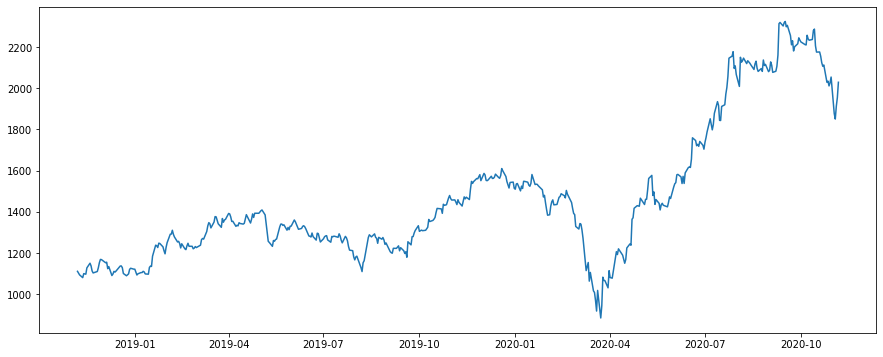

In [14]:
plt.figure(figsize=(15,6))
plt.plot(data)

In [37]:
feed=[[[data.close.iloc[i+j]] for j in range(46)]for i in range(len(data.close)-50)]
target=[data.close.iloc[i+50] for i in range(len(data.close)-50)]

In [38]:
feed=np.array(feed)
target=np.array(target)

In [39]:
scale=max(data.close)

In [40]:
feed=feed/scale
target=target/scale

In [41]:
feed.shape

(446, 46, 1)

In [42]:
target.shape

(446,)

In [43]:
#Let's build LSTM model

In [44]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [48]:
from keras.losses import sparse_categorical_crossentropy
from keras.layers import Dropout
model=Sequential()
model.add(LSTM(units=50,batch_input_shape=(None,46,1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(1,return_sequences=False))
model.compile(loss="mean_absolute_error",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 46, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 46, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 46, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 46, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1)                 208       
Total params: 30,808
Trainable params: 30,808
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Splitting the data
trainX,testX,trainY,testY=train_test_split(feed,target,test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(356, 46, 1)
(90, 46, 1)
(356,)
(90,)


In [50]:
history=model.fit(trainX,trainY,epochs=50,validation_data=(testX,testY))

Epoch 1/50
12/12 [==============================] - 2s 179ms/step - loss: 0.3743 - accuracy: 0.0000e+00 - val_loss: 0.0729 - val_accuracy: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 1s 68ms/step - loss: 0.1250 - accuracy: 0.0028 - val_loss: 0.0817 - val_accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 1s 68ms/step - loss: 0.1272 - accuracy: 0.0028 - val_loss: 0.0772 - val_accuracy: 0.0000e+00
Epoch 4/50
12/12 [==============================] - 1s 68ms/step - loss: 0.1171 - accuracy: 0.0028 - val_loss: 0.0741 - val_accuracy: 0.0000e+00
Epoch 5/50
12/12 [==============================] - 1s 67ms/step - loss: 0.1102 - accuracy: 0.0028 - val_loss: 0.0809 - val_accuracy: 0.0000e+00
Epoch 6/50
12/12 [==============================] - 1s 68ms/step - loss: 0.1054 - accuracy: 0.0028 - val_loss: 0.0560 - val_accuracy: 0.0000e+00
Epoch 7/50
12/12 [==============================] - 1s 64ms/step - loss: 0.0959 - accuracy: 0.0028 - val_loss: 0.0470 - val_a

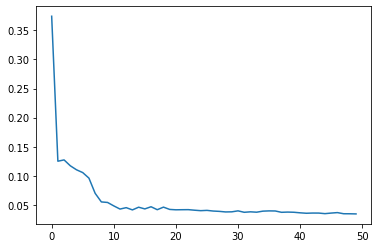

In [51]:
plt.plot(history.history["loss"])

In [52]:
results=model.predict(testX)

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(results,testY)

0.02646337573884204

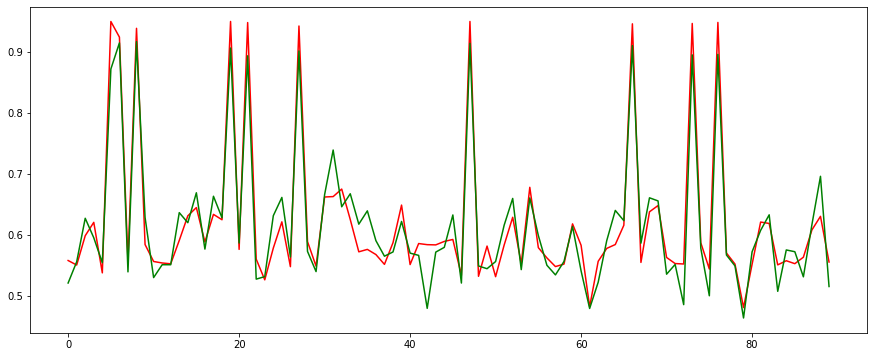

In [54]:
plt.figure(figsize=(15,6))
plt.plot(results,c="r")
plt.plot(testY,c="g")

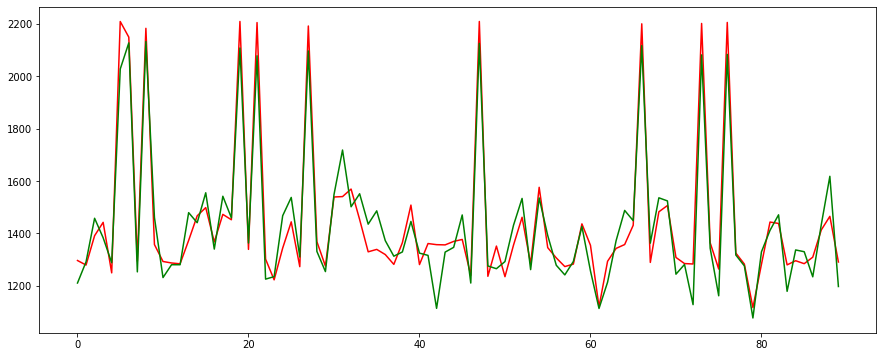

In [55]:
plt.figure(figsize=(15,6))
plt.plot(results*scale,c="r")
plt.plot(testY*scale,c="g")

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(results,testY)*scale

60.582993600368475